<h1>Intro to Computer Music, Lab07</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:

1. learn how to use pretty_midi library to generate MIDI in python
2. We focus on the basics this week: Note-on and Note-off
2. Use MIDI to recreate a simple composition by coding

<h2> Load packages </h2>


In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from pylab import *
import pretty_midi
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
from __future__ import print_function # use the print() function from Python3



<h2>Pretty MIDI Library</h2>

Let's first install pretty_midi: 

a) Download the package from https://github.com/craffel/pretty-midi

b) In the terminal, go to the folder, and run "python setup.py install"

On my Mac, step b) looks like:

Then, use pretty MIDI library to create a simple chord:

In [2]:
import pretty_midi
# Create a PrettyMIDI object
cello_music = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a cello instrument
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
# Iterate over note names, which will be converted to note number later
for note_name in ['C4', 'E4', 'G4','C5', 'E5', 'G5','C6']:
    # Retrieve the MIDI note number for this note name
    note_number = pretty_midi.note_name_to_number(note_name)
    # Create a Note instance for this note, starting at 0s and ending at 3s
    note = pretty_midi.Note(velocity=100, pitch=note_number, start=0, end=3)
    # Add it to our cello instrument
    cello.notes.append(note)
# Add the cello instrument to the PrettyMIDI object
cello_music.instruments.append(cello)
# Write out the MIDI data
cello_music.write('cello-C-chord.mid')


run the code above, now you should be able to find the midi file "cello-C-chord.mid" in the homework folder. If you want to use another instrument, simply substitute "Cello" with any standard MIDI instrument. A list can be found here http://www.pgmusic.com/tutorial_gm.htm

<h2>More of Data structure:</h2>


In [3]:
print(cello_music)
print(cello_music.instruments)
print(cello_music.instruments[0])
print(cello)
print(cello_music.instruments[0] == cello)

[Instrument(program=42, is_drum=False, name="")]
Instrument(program=42, is_drum=False, name="")
Instrument(program=42, is_drum=False, name="")
True


Let's look at the notes inside the cello. It is a list, where each element is a "Note" object.

In [4]:
cello.notes

[Note(start=0.000000, end=3.000000, pitch=60, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=64, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=67, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=72, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=76, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=79, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=84, velocity=100)]

<h2>A More Efficient Way for Music Generation:</h2>


We can also see this note list as a 7 by 4 matrix, and create/manipulate the matrix by built-in numpy methods. 

In [5]:
#import numpy library
from pylab import *
%matplotlib inline 

# create a 3 * 4 matrix, with initial values 0
note_matrix = matrix(zeros((7,4)))
print ("initial matrix is:\n", note_matrix)
### fill the matrix. 
# For a matrix M, numpy uses M[row_index, colume_index] to access the element
# M[:, column_index] returns an entire colume, and the same principle applies to 
# M[row_index, :]
note_matrix[:,2] = matrix([60,64,67,72,76,79,84]).T #.T is transpose
# start, end, and velocity. This assignment can be done in one line
# Note that the initial index is 0
note_matrix[:,[0,1,3]] = [0,3,100]
print ("now the matrix is:\n", note_matrix)

initial matrix is:
 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
now the matrix is:
 [[   0.    3.   60.  100.]
 [   0.    3.   64.  100.]
 [   0.    3.   67.  100.]
 [   0.    3.   72.  100.]
 [   0.    3.   76.  100.]
 [   0.    3.   79.  100.]
 [   0.    3.   84.  100.]]


Two handy functions: We can then call the following function to transfer the matrix back to "pretty_midi note" and display the piano roll.

In [6]:
# The next line makes all plots appear in the notebook, instead of a separate pop-up window
%matplotlib inline
# visualize score
def show_score(S, fs = 100):
    imshow(S, aspect='auto', origin='bottom', interpolation='nearest', cmap=cm.gray_r)
    xlabel('Time')
    ylabel('Pitch')
    pc=array(['C','C#','D','Eb','E','F','F#','G','Ab','A','Bb','B'])
    idx = tile([0,4,7],13)[:128]
    yticks(arange(0,128,4),pc[idx], fontsize=5)
    xticks(arange(0,S.shape[1],fs),arange(0,S.shape[1],fs)/fs, )     
def matrix2notes(m):
    # first sort the matrix to make sure starting time is in order
    m = array(m)
    m = m[argsort(m[:,0]),:]
    # transfer the databack to note list
    notes=[pretty_midi.Note(start=m[i,0], end=m[i,1], pitch=int(m[i,2]), velocity= int(m[i,3]) ) 
                            for i in range(size(m,0))]
    return notes


we've got an arpeggio with decreasing velocity:
 [[   0.            1.           60.          100.        ]
 [   1.            2.           64.           99.        ]
 [   2.            3.           67.           94.34314575]
 [   3.            4.           72.           84.41154273]
 [   4.            5.           76.           68.        ]
 [   5.            6.           79.           44.09830056]
 [   6.            7.           84.           11.81836926]]


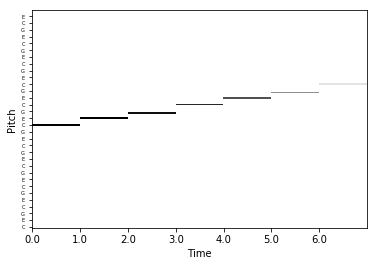

In [7]:
length = size(note_matrix,0)
# change starting time, ending time, and velocity by one line command
note_matrix[:,[0,1,3]] = matrix([[x for x in range(length)],
                                 [x+1 for x in range(length)],
                                 [100- x**2.5 for x in range(length)]]).T
print ("we've got an arpeggio with decreasing velocity:\n", note_matrix)
cello.notes = matrix2notes(note_matrix)
# show_score(cello_music.get_piano_roll(fs = 10), fs = 10)
show_score(cello_music.get_piano_roll())
wave = cello.synthesize(fs = 44100)
IPython.display.Audio(data=wave, rate=44100) # press the "play" button to hear audio


<h4>Pitch bends</h4>


Since MIDI notes are all defined to have a specific integer pitch value, in order to represent arbitrary pitch frequencies we need to use pitch bends. A PitchBend class in pretty_midi holds a time (in seconds) and a pitch offset. The pitch offset is an integer in the range [-8192, 8191], which in General MIDI spans the range from -2 to +2 semitones. As with Notes, the Instrument class has a list for PitchBend class instances.

In [8]:
# try to add only one pitch bend msg
print(cello.pitch_bends)
cello.pitch_bends.append(pretty_midi.PitchBend(8192/2, 0.5))

[]


adding lots of pitch bend in a row

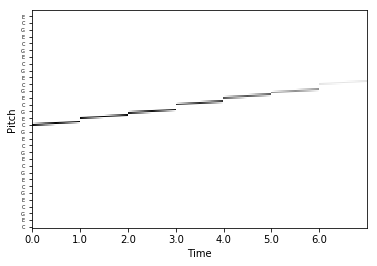

In [9]:
# how about adding a lot
for t in arange(0,7,0.01):
    cello.pitch_bends.append(pretty_midi.PitchBend(int(8192*(t % 1)), t))

show_score(cello_music.get_piano_roll())
wave = cello.synthesize(fs = 44100)
IPython.display.Audio(data=wave, rate=44100) # press the "play" button to hear audio


<h4>fractal music</h4>


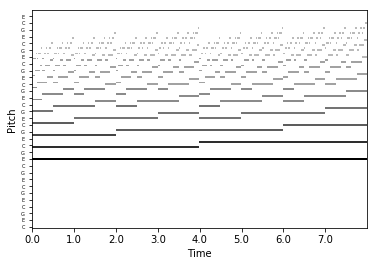

In [10]:
# a simple fractal music funtion which returns a note matrix 
Trans = 7
Vel = 100
def fractal_music(start, end, layers, base):
    # print (start, end, layers, base)
    if layers > 1:
        return concatenate((fractal_music(start,(start + end)/2.,layers-1,base + Trans),
                            fractal_music((start+end)/2.,end,layers-1,base + Trans + 3),
                            fractal_music(start,end,1,base)),0)
    else:
        return matrix([start, end, base, int(10*Vel/(base**(1.2)))])

# create an 8 secs fractal music with 5 layers. The base note is 48.
note_matrix = fractal_music(0,8,9,40)
cello.notes = matrix2notes(note_matrix)
cello.pitch_bends = []
# write the file
show_score(cello_music.get_piano_roll())
wave = cello.synthesize(fs = 44100)
IPython.display.Audio(data=wave, rate=44100) # press the "play" button to hear audio


<h2> Simple Markov Chain </h2>

[Instrument(program=25, is_drum=False, name="A.G 1"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=0, is_drum=False, name="A.P"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=30, is_drum=False, name="E.G-1"),
 Instrument(program=30, is_drum=False, name="E.G-2"),
 Instrument(program=48, is_drum=False, name="ST-L"),
 Instrument(program=48, is_drum=False, name="ST-R"),
 Instrument(program=48, is_drum=False, name="ST-C"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=25, is_drum=False, name="A.G 2"),
 Instrument(program=29, is_drum=False, name="E.G-3"),
 Instrument(program=29, is_drum=False, name="E.G-3(SUB)"),
 Instrument(program=29, is_drum=False, name="E.G-4")]

[Note(start=25.292396, end=25.434063, pitch=59, velocity=115),
 Note(start=25.451792, end=25.736667, pitch=71, velocity=115),
 Note(start=25.736667, end=25.880000, pitch=69, velocity=115),
 Note(start=25.880000, end=26.164875, pitch=67, velocity=115),
 Note(start=26.164875, end=26.594875, pitch=69, velocity=115),
 Note(start=26.594875, end=27.028458, pitch=71, velocity=115),
 Note(start=28.720542, end=28.863875, pitch=59, velocity=115),
 Note(start=28.881792, end=29.166667, pitch=71, velocity=115),
 Note(start=29.166667, end=29.310000, pitch=69, velocity=115),
 Note(start=29.310000, end=29.594875, pitch=67, velocity=115),
 Note(start=29.594875, end=30.023333, pitch=69, velocity=115),
 Note(start=30.023333, end=30.450104, pitch=64, velocity=115),
 Note(start=32.313583, end=32.598458, pitch=71, velocity=115),
 Note(start=32.598458, end=32.740000, pitch=69, velocity=115),
 Note(start=32.740000, end=33.024875, pitch=67, velocity=115),
 Note(start=33.024875, end=33.168208, pitch=67, velocit

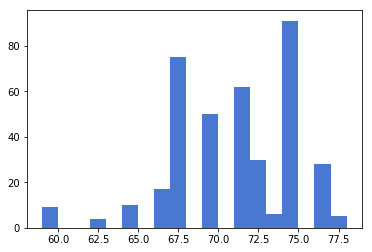

In [11]:
midi_data = pretty_midi.PrettyMIDI('./RM-P009.SMF_SYNC.MID')
display(midi_data.instruments)
notes = midi_data.instruments[3].notes
display(notes)
# pitch
pitches = [n.pitch for n in notes]
#plt.figure(0)
plt.hist(pitches, bins = arange(min(pitches),max(pitches)))
midi_data.instruments = [midi_data.instruments[3]]
midi_data.write('melody.mid')


beat locations:
 [   0.      1.45    2.31    3.17    4.02    4.88    5.74    6.6     7.45
    8.31    9.17   10.02   10.88   11.74   12.6    13.45   14.31   15.17
   16.02   16.88   17.74   18.6    19.45   20.31   21.17   22.02   22.88
   23.74   24.6    25.45   26.31   27.17   28.02   28.88   29.74   30.59
   31.45   32.31   33.17   34.02   34.88   35.74   36.59   37.45   38.31
   39.17   40.02   40.88   41.74   42.59   43.45   44.31   45.17   46.02
   46.88   47.74   48.59   49.45   50.31   51.16   52.02   52.88   53.74
   54.59   55.45   56.31   57.16   58.02   58.88   59.74   60.59   61.45
   62.31   63.16   64.02   64.88   65.74   66.59   67.45   68.31   69.16
   70.02   70.88   71.73   72.59   73.45   74.31   75.16   76.02   76.88
   77.73   78.59   79.45   80.31   81.16   82.02   82.88   83.74   84.59
   85.45   86.3    87.16   88.02   88.88   89.73   90.59   91.45   92.31
   93.16   94.02   94.88   95.73   96.59   97.45   98.3    99.16  100.02
  100.88  101.73  102.59  103.45  

(array([  69.,   14.,   79.,  209.,    8.,    0.,    0.,    7.,    4.,
           0.,    0.,    0.,    0.,    0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 14 Patch objects>)

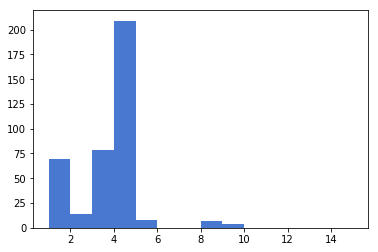

In [12]:
# duration
beats = midi_data.get_beats()
print("beat locations:\n",beats)
beat_durs = list(np.diff(beats))
#print(beat_durs)
beat_dur = max(set(beat_durs), key = beat_durs.count) 
print("one beat is:\n", beat_dur)
dur_unit = beat_dur/8
durs = [int(round((n.end - n.start)/dur_unit)) for n in notes]
print("if 1/8 beat is a unit, note durations are:\n", durs)
plt.hist(durs,bins = arange(min(durs),16))

In [13]:
pitch_id = list(set(pitches))
pitch_id.sort()
print(pitch_id)
dur_id = list(set(durs))
dur_id.sort()
dur_id = dur_id[0:len(dur_id)-1]
print(dur_id)
Trans_pitch = np.zeros((len(pitch_id),len(pitch_id)))
Trans_dur = np.zeros((len(dur_id),len(dur_id)))
print(Trans_pitch.shape)
print(Trans_dur.shape)
type(pitch_id)

[59, 62, 64, 66, 67, 69, 71, 72, 73, 74, 76, 78, 79]
[1, 2, 3, 4, 5, 8, 9, 17]
(13, 13)
(8, 8)


list

before normalization
Trans pitch freq:
 [[  1.   0.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   6.   0.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   2.   8.  16.  13.  16.   4.   0.   0.   8.   8.   0.   0.]
 [  0.   0.   2.   0.  18.   9.  11.   4.   0.   6.   0.   0.   0.]
 [  5.   0.   0.   0.   6.  22.   5.  16.   2.   4.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   3.  22.   0.   0.   5.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   2.   0.   2.   2.   0.   0.   0.]
 [  0.   0.   0.   1.  16.   0.   6.  10.   2.  53.   3.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  11.  12.   0.   5.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   4.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   1.]]
Trans dur freq:
 [[   5.    3.   54.    5.    0.    2.    0.    0.]
 [   3.

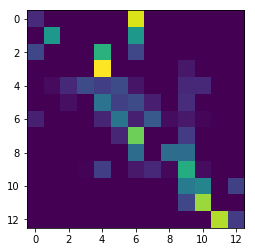

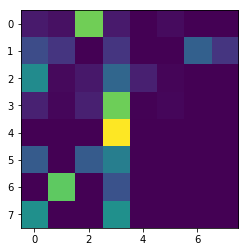

In [14]:
# loop through the piece
for i in range(len(notes)-1):
    if pitches[i] in pitch_id and pitches[i+1] in pitch_id:
        p1 = pitch_id.index(pitches[i])
        p2 = pitch_id.index(pitches[i+1])
        Trans_pitch[p1,p2] = Trans_pitch[p1,p2] + 1
    if durs[i] in dur_id and durs[i+1] in dur_id:
        d1 = dur_id.index(durs[i])
        d2 = dur_id.index(durs[i+1])
        Trans_dur[d1,d2] = Trans_dur[d1,d2] + 1
print("before normalization")
print("Trans pitch freq:\n",Trans_pitch)
print("Trans dur freq:\n",Trans_dur)
# normalization
row_sums = Trans_pitch.sum(axis=1)
Trans_pitch = Trans_pitch / row_sums[:, np.newaxis]
row_sums = Trans_dur.sum(axis=1)
Trans_dur = Trans_dur / row_sums[:, np.newaxis]
# visualize
print("after normalization")
print("Trans pitch prob:\n",np.around(Trans_pitch,2))
print("Trans dur prob:\n",np.around(Trans_dur,2))
plt.imshow(Trans_pitch)
figure()
plt.imshow(Trans_dur)


In [15]:
N = 100; p_i = 0; d_i = 0; # p and d are indix of pitch_id and dur_id
# empty note matrix
notes2 = np.zeros((N,4))
# first row 
notes2[0,[0,1,2]] = [0, dur_id[d_i], pitch_id[p_i]]
# roll the dice to generate the rest of the piece
for i in range(1,N):
    p_i = np.random.choice(np.arange(len(pitch_id)), p = Trans_pitch[p_i,:])
    d_i = np.random.choice(np.arange(len(dur_id)), p = Trans_dur[d_i,:])
    offset = notes2[i-1,1]
    notes2[i,[0,1,2]] = [offset, offset + dur_id[d_i], pitch_id[p_i]]
# assign velocity and tempo
notes2[:,3] = 100
notes2[:,[0,1]] = notes2[:,[0,1]] * dur_unit
#print(notes2)
# transfer matrix back to notes
notes2 = matrix2notes(notes2);
# substitute the original notes
midi_data.instruments[0].notes = notes2 
# save and display
wave = midi_data.instruments[0].synthesize(fs = 44100)
IPython.display.Audio(data=wave, rate=44100) 
midi_data.write('./remix.mid')


<h2> To do:</h2>

1. Try to create your own fractal music
2. Try to add pitch bend into your music in a creative way
3. Improve the Markov chain and use it for your composition
4. Optional: Try some other "deterministic algorithms" (page 14&15) covered in class
5. upload the code with midi file to NYU classes